# Unit 9 Homework:  Employee Database Bonus

As you examine the data, you begin to suspect that the dataset is fake. Maybe your boss gave you spurious data in order to test the data engineering skills of a new employee? To confirm your hunch, you decide to create a visualization of the data to present to your boss. Follow these steps: 

1. Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the following code to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:

   ```sql
   from sqlalchemy import create_engine
   engine = create_engine('postgresql://localhost:5432/<your_db_name>')
   connection = engine.connect()
   ```

    * Consult the [SQLAlchemy documentation](https://docs.sqlalchemy.org/en/latest/core/engines.html#postgresql) for more information.

    * If you’re using a password, do not upload your password to your GitHub repository. Review this [video](https://www.youtube.com/watch?v=2uaTPmNvH0I) and the [GitHub website](https://help.github.com/en/github/using-git/ignoring-files) for more information.

2. Create a histogram to visualize the most common salary ranges for employees.

3. Create a bar chart of average salary by title.

In [1]:
# Import libraries and dependencies

import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime, Float
import psycopg2

In [2]:
#1. Import the SQL database into Pandas. 
# pull connection info from config file 
from config import sql_str
sql_engine = create_engine(sql_str)

In [3]:
#test query to verify that connection works
query = 'select * from dept_manager'
df = pd.read_sql_query(query,sql_engine)
df.head(2)

,dept_no,emp_no
0,d001,110022
1,d001,110039


In [4]:
# 2. Create a histogram to visualize the most common salary ranges for employees.
#pull salary info from salaries table
query2 = 'select * from salaries'
df2 = pd.read_sql_query(query2,sql_engine)
df2.head(2)

,emp_no,salary
0,10001,60117
1,10002,65828


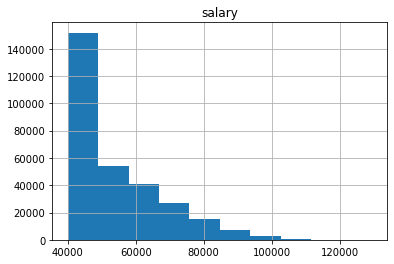

In [5]:
#create histogram of salaries
christogram= df2.hist('salary')

In [6]:
# 3. Create a bar chart of average salary by title.
# pull summaries of salary data by job titles
query3 = 'select min(s.salary) as min_salary, round(avg(s.salary),0) as avg_salary, max(s.salary) as max_salary, t.title from salaries s, employees e, titles t where s.emp_no = e.emp_no and e.title_id = t.title_id group by t.title'
df3 = pd.read_sql_query(query3,sql_engine)
df3

,min_salary,avg_salary,max_salary,title
0,40000,48564.0,99683,Assistant Engineer
1,40000,48535.0,100683,Engineer
2,40000,51531.0,72446,Manager
3,40000,48507.0,110449,Senior Engineer
4,40000,58550.0,127238,Senior Staff
5,40000,58465.0,129492,Staff
6,40000,48583.0,104065,Technique Leader


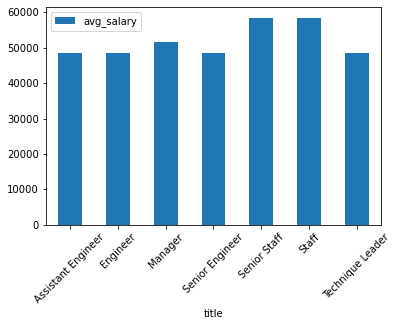

In [7]:
# create bar plot of average salary by title- not a lot of difference between levels
df3.plot.bar(x = 'title', y = 'avg_salary',rot = 45)

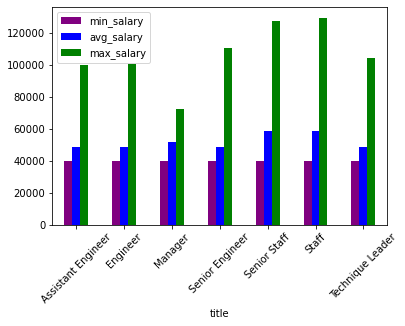

In [8]:
# create side by side bar plot of min, average and max salaries by title
df3.plot.bar(x = 'title',rot = 45, color = ('purple','blue','green'))


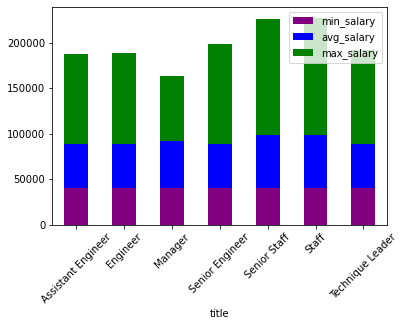

In [9]:
# create stacked bar plot of min, average and max salaries by title
df3.plot.bar(x = 'title',stacked = True, rot = 45, color = ('purple','blue','green') )